## The Perceptron

### 1. Background
The perceptron is a supervised ML algorithm that is used for binary classification ($y_i \in \{-1, 1\}$). The perceptron is based on the theory that if a dataset is linearly seperable there is a hyperplane that can seperate the two classes - i.e. the dataset $X$ for the two classification labels lie in space, such that an $n-1$ plane can successfully seperate the two datasets - where $n$ in number of dimensions of $X$.

Mathematically speaking, we can define the equation of this hyperplane as:
$$ H = \mathbf{w}^T\mathbf{x}_i + b $$

Once this hyperplane is found, any new test point $\mathbf{x}_t$ will be classified according to which side of the hyperplane $\mathbf{x}_t$ lies:
$$ h(\mathbf{x}_t) = sign( \mathbf{w}^T\mathbf{x}_t + b) $$
$$y_i \in \{-1, 1\}$$ 

For easy computing, we can absorb $b$ into our vector such that:
$$ \mathbf{x_i} = \begin{bmatrix} \mathbf{x_i} \\ 1 \end{bmatrix} $$
$$ \mathbf{w} = \begin{bmatrix} \mathbf{w} \\ b \end{bmatrix} $$
$$ \therefore h(\mathbf{x}_i) = sign( \mathbf{w}^T\mathbf{x}_i) $$

### 2. How to Find the Hyperplane: The Perceptron Algorithm
Initialize $ \mathbf{w} = \mathbf{0} $
<p> Initialize $ m = 1 $ ($m$ is the number of misclassified points)</p>
<p>While $m != 0$: </p>
<blockquote> 
    <p>for $(\mathbf{x_i},y_i) \in D$ ($D$ is the dataset)<p>
    <blockquote> 
        <p> if $y_i(\mathbf{w}^T \cdot \mathbf{x_i}) <= 0: $<p>
        <blockquote>
            <p>$\mathbf{w} = \mathbf{w} + y \mathbf{x}_i$</p>
            <p>$m = m + 1$</p>
        </blockquote>
    </blockquote>
 </blockquote>

Once $m = 0$, the loop will break, and the weight vector $\mathbf{w}$ is finalized.

### 3. Purpose of this Exercise
In the following notebook, we will be demonstrating the algorithm mentioned and visualizing the results in 2-D and 3-D space. 

### 4. Perceptron in 2 Dimensional Space

##### 4.1 Creating and Plotting the Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#initialize number of datapoints
t = 100

In [3]:
#generate random matrix with 2 dimensions
np.random.seed(20)
X = np.random.randint(1,10, size=(t,2))

In [4]:
#create function to generate targets that are linearly seperable
def targets(X, linear_limit):
    y = []
    for i in range(len(X)):
        if X[i][0] < linear_limit:
            y.append(-1)
        else:
            y.append(1)
    return y

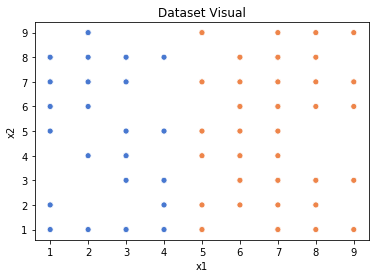

In [5]:
#create df for easy plotting
df_x1 = []
df_x2 = []
y = targets(X, 5)

for i in range(t):
    df_x1.append(X[i][0])
    df_x2.append(X[i][1])
    
df = pd.DataFrame()
df['x1'] = df_x1
df['x2'] = df_x2
df['y'] = y

#plot dataset
sns.scatterplot(x=df.x1, y=df.x2, hue=df.y, legend=None, palette='muted')
plt.title('Dataset Visual');

The plot above is a visual of the dataset, where the blue labels refer to one label class, and the orange labels the other. As we can see, the data set is linearly seperable.

##### 4.2 Finding the Hyperplane

In [6]:
#initialize w with b
w = np.array([0,0,0])

In [7]:
#absorb 1-vector by x to account for bias term in w
one_array = np.ones((1,t)).transpose()
x = np.concatenate((X, one_array), axis=1)

In [8]:
#initialize m
m=1

#implement perceptron algorithm
while m != 0:
    m = 0
    for i in range(len(df)):
        if (y[i]*w.transpose().dot(x[i])) <= 0:
            w += (np.int16(y[i])*np.int16(x[i]))
            m += 1

In [9]:
#get w
print(w)

[ 12   1 -60]


The equation for the seperating hyperplane for this dataset is:
$$ H(\mathbf{x}_1,\mathbf{x}_2) = 12\mathbf{x}_1 + \mathbf{x}_2 - 60 $$

##### 4.3 Finding the Hyperplane Intercepts
<center>let $H$ = 0 </center>
$$ \therefore 0 = 12\mathbf{x}_1 + \mathbf{x}_2 - 60$$

<center>if $\mathbf{x}_1 = 0, x_2 = 60 $</center>
<center>if $\mathbf{x}_2 = 0, x_1 = 5 $</center>

In [10]:
#plot hyperplane - we wont plot the intercepts exactly as it will 
#obscure our graph so we will plot within the range of our data using the Hyperplane equation

#if x_2 = 10
H_1 = (60-10)/12

pt_x1 = [H_1,5]
pt_x2 = [10,0]

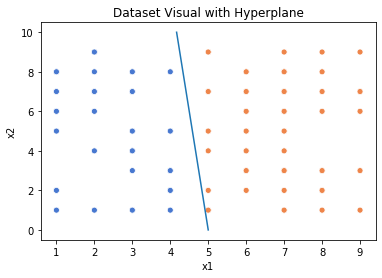

In [11]:
#plot dataset
sns.scatterplot(x=df.x1, y=df.x2, hue=df.y, legend=None, palette='muted')
plt.title('Dataset Visual with Hyperplane')
plt.plot(pt_x1, pt_x2);

### 5. Perceptron in 3 Dimensional Space

##### 5.1 Creating and Plotting the Dataset

In [12]:
#generate random matrix with 3 dimensions
np.random.seed(20)
X_3d = np.random.randint(1,10, size=(t,3))

In [13]:
#import libary for plotting in 3 dimensions
from mpl_toolkits.mplot3d import Axes3D

In [14]:
#create df for easy plotting
df2_x1 = []
df2_x2 = []
df2_x3 = []
y2 = targets(X_3d, 4)

for i in range(t):
    df2_x1.append(X_3d[i][0])
    df2_x2.append(X_3d[i][1])
    df2_x3.append(X_3d[i][2])
    
df2 = pd.DataFrame()
df2['x1'] = df2_x1
df2['x2'] = df2_x2
df2['x3'] = df2_x3
df2['y'] = y2

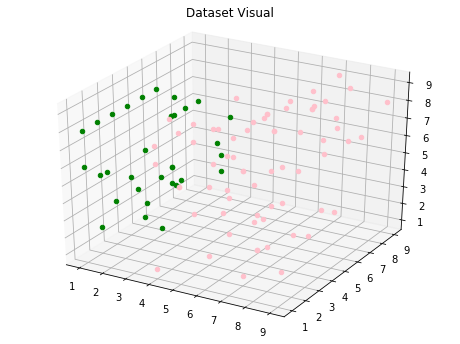

In [15]:
#plot graph
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Dataset Visual', pad=20)

for i in range(len(df2)):
    obs = df2.loc[i]
    if obs.y == -1:
        ax.scatter(obs.x1, obs.x2, obs.x3, color='green')
    else:
        ax.scatter(obs.x1, obs.x2, obs.x3, color='pink')

##### 5.2 Finding the Hyperplane

In [16]:
#initialize w with b
w = np.array([0,0,0,0])

In [17]:
#absorb 1-vector by x to account for bias term in w
one_array = np.ones((1,t)).transpose()
x = np.concatenate((X_3d, one_array), axis=1)

In [18]:
#initialize m
m = 1

#apply perceptron algorithm
while m != 0:
    m = 0
    for i in range(len(df)):
        if (y2[i]*w.transpose().dot(x[i])) <= 0:
            w += (np.int16(y2[i])*np.int16(x[i]))
            m += 1

In [19]:
#get weight vector
print(w)

[ 33  -1  -3 -92]


The equation for the seperating hyperplane for this dataset is:
$$ H(\mathbf{x}_1,\mathbf{x}_2) = 33\mathbf{x}_1 -\mathbf{x}_2 - 3\mathbf{x}_3 -92 $$

##### 4.3 Plotting Dataset with Hyperplane

In [20]:
#creating plane dataset
pt_x1 = np.linspace(0, 10)
pt_x2 =  np.linspace(0, 10)
X1,X2 = np.meshgrid(pt_x1,pt_x2)
X3 = (33/3)*X1 - (1/3)*X2 - (92/3)

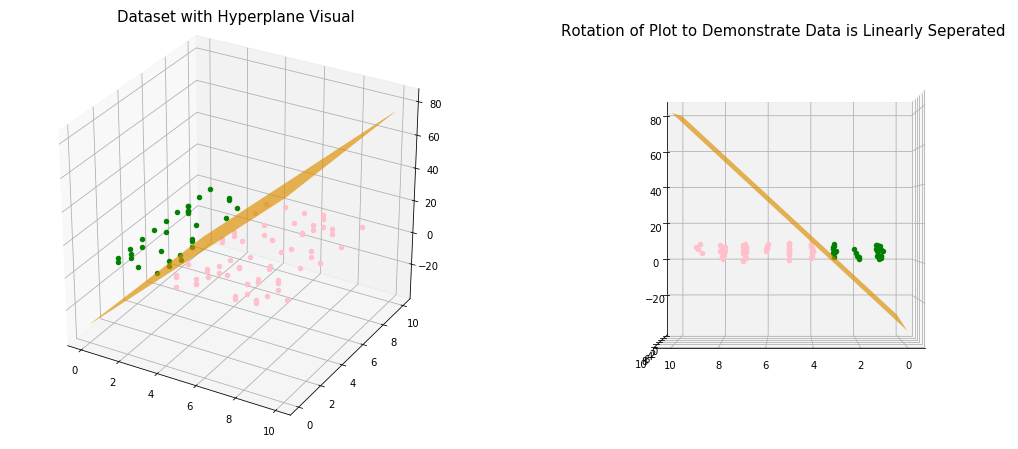

In [21]:
#plot graph with hyperplane
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

for i in range(len(df2)):
    obs = df2.loc[i]
    if obs.y == -1:
        ax.scatter(obs.x1, obs.x2, obs.x3, color='green')
        ax2.scatter(obs.x1, obs.x2, obs.x3, color='green')
    else:
        ax.scatter(obs.x1, obs.x2, obs.x3, color='pink')
        ax2.scatter(obs.x1, obs.x2, obs.x3, color='pink')
        
ax.plot_surface(X1, X2, X3, color='orange')
ax2.plot_surface(X1, X2, X3, color='orange')
ax2.view_init(0,90)

ax.set_title('Dataset with Hyperplane Visual', pad=20, fontsize=15)
ax2.set_title('Rotation of Plot to Demonstrate Data is Linearly Seperated', fontsize=15);